In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# Reading in the data
df = pd.read_csv('USvideos.csv')

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
# Loading json data

import json

with open('US_category_id.json') as json_data:
    d = json.load(json_data)
    print(d)

{'kind': 'youtube#videoCategoryListResponse', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'yout

In [5]:
#Joining json data with the dataset

with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [6]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
category_name             object
dtype: object

In [7]:
df.shape

(40949, 17)

In [8]:
# Transforming trending date column to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m').dt.date

# Transforming trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_date'] = publish_time.dt.date
df['publish_time'] = publish_time.dt.time
df['publish_hour'] = publish_time.dt.hour
df['month'] = publish_time.dt.month


In [9]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_date,publish_hour,month
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,17,11
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,2017-11-13,7,11
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-12,19,11
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2017-11-13,11,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017-11-12,18,11


In [10]:
#Finding null values
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name               0
publish_date                0
publish_hour                0
month                       0
dtype: int64

In [11]:
#Filling in null values
df["description"] = df["description"].fillna(value="")

In [12]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_name             0
publish_date              0
publish_hour              0
month                     0
dtype: int64

In [13]:
#Finding the Youtube channels with the most trending videos

df['channel_title'].value_counts()[:10]

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
TheEllenShow                              193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64

In [14]:
#Checking how many YouTube videos are trending each day.
df['trending_date'].value_counts(ascending=False)[:10]

2017-11-18    200
2018-02-19    200
2018-02-10    200
2017-12-18    200
2018-01-07    200
2018-02-09    200
2018-01-28    200
2018-01-30    200
2017-11-17    200
2018-03-05    200
Name: trending_date, dtype: int64

In [15]:
df['tags'].value_counts()[:10]

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                       1535
ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"      87
Jacksfilms|"Jack Douglass"|"YGS"|"YGS 100"|"YGS 50"|"The Best of Your Grammar Sucks"|"Your Grammar S

In [16]:
df['tags']

0                                          SHANtell martin
1        last week tonight trump presidency|"last week ...
2        racist superman|"rudy"|"mancuso"|"king"|"bach"...
3        rhett and link|"gmm"|"good mythical morning"|"...
4        ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
5        ijustine|"week with iPhone X"|"iphone x"|"appl...
6        SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...
7        5 Ice Cream Gadgets|"Ice Cream"|"Cream Sandwic...
8        Trailer|"Hugh Jackman"|"Michelle Williams"|"Za...
9        vox.com|"vox"|"explain"|"shift change"|"future...
10       NFL|"Football"|"offense"|"defense"|"afc"|"nfc"...
11       The Walking Dead|"shiva"|"tiger"|"king ezekiel...
12       marshmello|"blocks"|"marshmello blocks"|"block...
13       nowthis|"nowthis world"|"world news"|"nowthis ...
14       shopping for new fish|"new fish"|"aquarium fis...
15       Robots|"Boston Dynamics"|"SpotMini"|"Legged Lo...
16       pacific rim|"pacific rim 2"|"pacific rim seque.

In [17]:
#Splitting tags
df['tags_listed'] = df['tags'].map(lambda x: x.split('|'))

In [18]:
# Counting tags
list_of_tags = []
for i in df['tags_listed']:
    for j in i:
        list_of_tags.append(j)
len(set(list_of_tags))

58123

In [19]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_date,publish_hour,month,tags_listed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,17,11,[SHANtell martin]
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,2017-11-13,7,11,"[last week tonight trump presidency, ""last wee..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-12,19,11,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""..."
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2017-11-13,11,11,"[rhett and link, ""gmm"", ""good mythical morning..."
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017-11-12,18,11,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y..."


In [20]:
#creating new feature
df['days_to_trending'] = (df.trending_date - df.publish_date).dt.days

In [21]:
#Days to trending percentile distribution
df.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

count    40949.000000
mean        16.810423
std        146.014303
min          0.000000
5%           1.000000
25%          3.000000
50%          5.000000
75%          9.000000
95%         17.000000
max       4215.000000
Name: days_to_trending, dtype: float64

In [22]:
#Checking for the videos that took the longest to trend.
my_df_full = df.reset_index().sort_values('days_to_trending', ascending=False).set_index('video_id')
my_df_full

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_date,publish_hour,month,tags_listed,days_to_trending
video_id,,,,,,,,,,,,,,,,,,,,,
MJO3FmmFuh4,16294,2018-02-05,Budweiser - Original Whazzup? ad,dannotv,24,08:24:11,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,...,False,False,False,"Original Whazzup ad - however, there is a litt...",Entertainment,2006-07-23,8,7,"[Budweiser, ""Bud"", ""Whazzup"", ""ad""]",4215
UQtt9I6c-YM,11375,2018-01-09,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50168,46,6,...,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,2008-04-05,18,4,"[Meryl, ""Streep"", ""kramer"", ""vs"", ""dustin"", ""h...",3566
UQtt9I6c-YM,11150,2018-01-08,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50117,46,6,...,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,2008-04-05,18,4,"[Meryl, ""Streep"", ""kramer"", ""vs"", ""dustin"", ""h...",3565
UQtt9I6c-YM,10921,2018-01-07,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50030,46,6,...,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,2008-04-05,18,4,"[Meryl, ""Streep"", ""kramer"", ""vs"", ""dustin"", ""h...",3564
UQtt9I6c-YM,10710,2018-01-06,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",49942,46,6,...,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,2008-04-05,18,4,"[Meryl, ""Streep"", ""kramer"", ""vs"", ""dustin"", ""h...",3563
wFEAoF7RC7Y,2979,2017-11-28,Behind The Sounds: That's Not Me,BehindTheSounds,10,00:07:56,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|...",86897,469,4,...,False,False,False,A video detailing the creative process behind ...,Music,2008-06-17,0,6,"[Beach, ""Boys"", ""Brian"", ""Wilson"", ""Dennis"", ""...",3451
wFEAoF7RC7Y,2750,2017-11-27,Behind The Sounds: That's Not Me,BehindTheSounds,10,00:07:56,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|...",86861,469,4,...,False,False,False,A video detailing the creative process behind ...,Music,2008-06-17,0,6,"[Beach, ""Boys"", ""Brian"", ""Wilson"", ""Dennis"", ""...",3450
wFEAoF7RC7Y,2526,2017-11-26,Behind The Sounds: That's Not Me,BehindTheSounds,10,00:07:56,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|...",86819,469,4,...,False,False,False,A video detailing the creative process behind ...,Music,2008-06-17,0,6,"[Beach, ""Boys"", ""Brian"", ""Wilson"", ""Dennis"", ""...",3449
wFEAoF7RC7Y,2311,2017-11-25,Behind The Sounds: That's Not Me,BehindTheSounds,10,00:07:56,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|...",86744,469,4,...,False,False,False,A video detailing the creative process behind ...,Music,2008-06-17,0,6,"[Beach, ""Boys"", ""Brian"", ""Wilson"", ""Dennis"", ""...",3448


In [23]:
# Videos that took the longest to trend
my_df_full = df.reset_index().sort_values('days_to_trending',).set_index('video_id')
df = df.reset_index().sort_values('days_to_trending').drop_duplicates('video_id',keep='last').set_index('video_id')
df[['days_to_trending','publish_time']].sort_values(by='days_to_trending', ascending=False)[0:10]

,days_to_trending,publish_time
video_id,,
MJO3FmmFuh4,4215,08:24:11
UQtt9I6c-YM,3566,18:22:40
wFEAoF7RC7Y,3451,00:07:56
Y8JGfi4MJ8k,3400,12:16:58
rO_mAQC9bv0,3177,00:27:20
2vQ_fnlvvr8,3113,01:55:32
tYFYoLEO0dM,3045,15:36:33
c_KdAO6MqiM,3027,16:27:28
-37nIo_tLnk,2940,23:26:32


In [24]:
df.head()

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_date,publish_hour,month,tags_listed,days_to_trending
video_id,,,,,,,,,,,,,,,,,,,,,
FchkqXEg0qs,40549,2018-06-13,Nintendo @ E3 2018: Day 1,Nintendo,20,01:18:57,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",3238183,61841,3708,...,True,False,False,ESRB Rating: RATING PENDING to Teen. Rating Pe...,Gaming,2018-06-13,1,6,"[nintendo, ""play"", ""play nintendo"", ""game"", ""g...",0
ZYCDNf1a-kY,5212,2017-12-10,James Franco Audience Questions Monologue - SNL,Saturday Night Live,24,06:14:05,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",9423,785,17,...,False,False,False,Host James Franco takes questions from audienc...,Entertainment,2017-12-10,6,12,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",0
ss6qQM054B0,11000,2018-01-08,Oprah Winfrey Golden Globes Cecil B. DeMille A...,Pop & Sports HQ,17,03:24:55,"Oprah Winfrey|""Golden Globes""|""Golden Globes C...",305899,6967,494,...,False,False,False,,Sports,2018-01-08,3,1,"[Oprah Winfrey, ""Golden Globes"", ""Golden Globe...",0
T3hXC5yNZOc,20969,2018-03-01,Iggy Azalea - Savior ft. Quavo,iggyazaleamusicVEVO,10,05:00:01,"Iggy|""Azalea""|""Savior""|""Island""|""Records""|""Hip...",285984,34129,1625,...,False,False,False,Music video by Iggy Azalea performing Savior. ...,Music,2018-03-01,5,3,"[Iggy, ""Azalea"", ""Savior"", ""Island"", ""Records""...",0
391JeKrI30w,13613,2018-01-23,Watch the House floor live,Washington Post,25,01:17:58,"breaking news video|""video updates""|""live vide...",57143,234,176,...,False,False,False,"House votes to end government shutdown, sendin...",News & Politics,2018-01-23,1,1,"[breaking news video, ""video updates"", ""live v...",0


In [25]:
#Creating the trend_duration and publish to trend feature
publish_to_trend = {}
my_df_first = my_df_full.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
diff_first = (my_df_first['trending_date']).astype('datetime64[ns]')-my_df_first['publish_date'].astype('datetime64[ns]')

diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']

for i, row in diff_first.iterrows():
    publish_to_trend[row['video_id']] = row['publish_to_trend'].days

my_df_last = df
diff_last = df['trending_date'].astype('datetime64[ns]' )-df['publish_date'].astype('datetime64[ns]')
diff_last = diff_last.reset_index()
diff_last.columns = ['vLideo_id','publish_to_trend_last']
df = df.reset_index()
df.insert(4,'publish_to_trend_last', diff_last['publish_to_trend_last'].astype('timedelta64[D]').astype(int))
df.insert(4, 'publish_to_trend', df['video_id'].map(publish_to_trend))
df.insert(4, 'trend_duration', 0)
df['trend_duration'] = (df['publish_to_trend_last']-df['publish_to_trend'])+1
df.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()

,publish_to_trend,trend_duration
video_id,,
kZete48ZtsY,1,49
f4FuOi9rvKw,5,32
jYuQzAxBVZU,5,32
oJ2faqXlU1s,4,32
M4ZoCHID9GI,2,31


C:\Users\mithi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


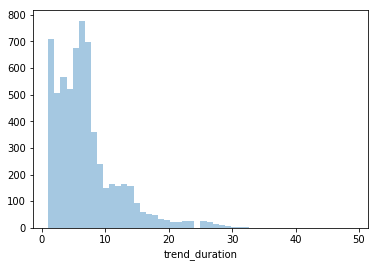

In [26]:
#Trend Duration distribution
d= sns.distplot(df['trend_duration'], kde=False, rug=False,);

In [27]:
#Seeing the number of days how long a video trends for
df['trend_duration'].value_counts()

6     777
1     708
7     699
5     675
3     565
4     523
2     508
8     360
9     240
13    166
11    164
14    159
12    156
10    150
15     92
16     59
17     51
18     48
19     32
20     29
23     27
25     27
24     25
22     23
21     22
26     21
27     16
28     12
29      7
30      4
32      3
31      2
49      1
Name: trend_duration, dtype: int64

In [28]:
#Percentile distribution for trend duration
df.trend_duration.describe(percentiles=[.05,.25,.5,.75,.95])

count    6351.000000
mean        6.769328
std         5.190225
min         1.000000
5%          1.000000
25%         3.000000
50%         6.000000
75%         8.000000
95%        17.000000
max        49.000000
Name: trend_duration, dtype: float64

In [29]:
df.head()

,video_id,index,trending_date,title,trend_duration,publish_to_trend,publish_to_trend_last,channel_title,category_id,publish_time,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_date,publish_hour,month,tags_listed,days_to_trending
0,FchkqXEg0qs,40549,2018-06-13,Nintendo @ E3 2018: Day 1,1,0,0,Nintendo,20,01:18:57,...,True,False,False,ESRB Rating: RATING PENDING to Teen. Rating Pe...,Gaming,2018-06-13,1,6,"[nintendo, ""play"", ""play nintendo"", ""game"", ""g...",0
1,ZYCDNf1a-kY,5212,2017-12-10,James Franco Audience Questions Monologue - SNL,1,0,0,Saturday Night Live,24,06:14:05,...,False,False,False,Host James Franco takes questions from audienc...,Entertainment,2017-12-10,6,12,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",0
2,ss6qQM054B0,11000,2018-01-08,Oprah Winfrey Golden Globes Cecil B. DeMille A...,1,0,0,Pop & Sports HQ,17,03:24:55,...,False,False,False,,Sports,2018-01-08,3,1,"[Oprah Winfrey, ""Golden Globes"", ""Golden Globe...",0
3,T3hXC5yNZOc,20969,2018-03-01,Iggy Azalea - Savior ft. Quavo,1,0,0,iggyazaleamusicVEVO,10,05:00:01,...,False,False,False,Music video by Iggy Azalea performing Savior. ...,Music,2018-03-01,5,3,"[Iggy, ""Azalea"", ""Savior"", ""Island"", ""Records""...",0
4,391JeKrI30w,13613,2018-01-23,Watch the House floor live,1,0,0,Washington Post,25,01:17:58,...,False,False,False,"House votes to end government shutdown, sendin...",News & Politics,2018-01-23,1,1,"[breaking news video, ""video updates"", ""live v...",0


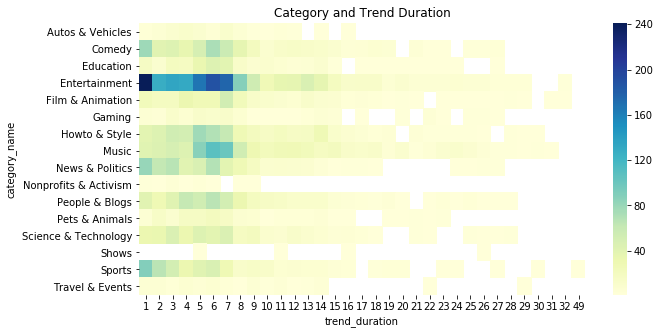

In [30]:
#Heatmap of plotting category by trend duration
category_trend= df.groupby(['category_name','trend_duration']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(10,5))#You can Arrange The Size As Per Requirement
sns.heatmap(category_trend, cmap="YlGnBu")
plt.title("Category and Trend Duration");


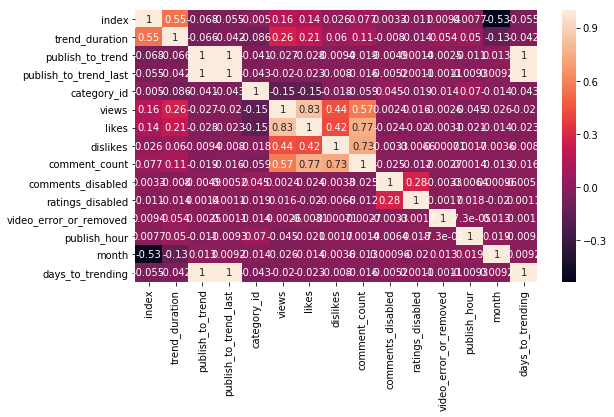

In [31]:
#Correlation Heatmap
plt.figure(figsize = (9,5))
sns.heatmap(df.corr(), annot=True);

C:\Users\mithi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


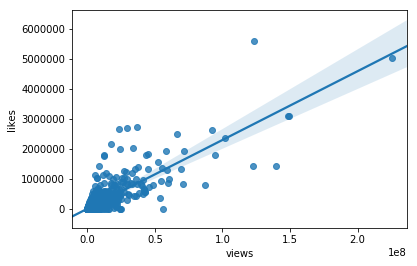

In [32]:
# Linear Regression plot between views and likes
sns.regplot(x=df["views"], y=df["likes"], fit_reg=True);

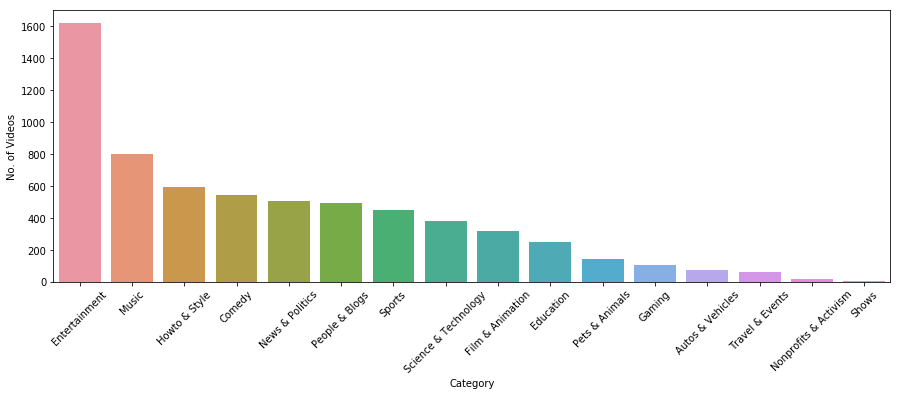

In [33]:
# Bar graph of the number videos that were trending by Category
ax= plt.rcParams['figure.figsize']=15,5
ax= sns.countplot(x='category_name', data=df, order= df['category_name'].value_counts().index)
ax.set(xlabel='Category', ylabel='No. of Videos')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

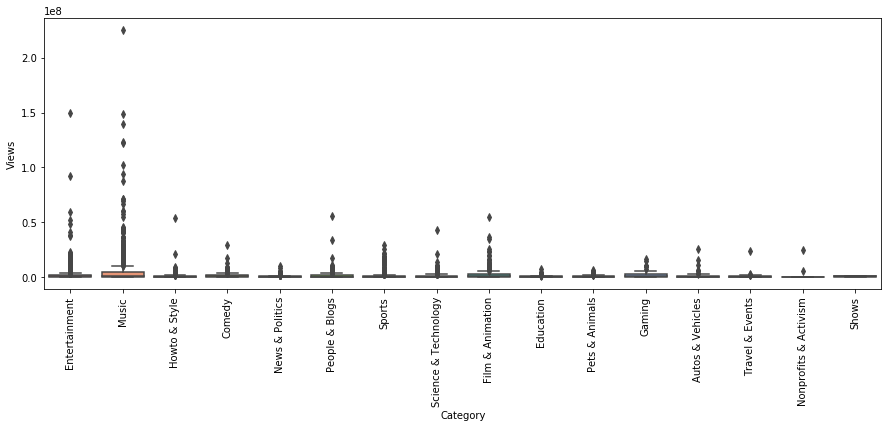

In [34]:
# Boxplot of views among each category
ax= sns.boxplot(x='category_name',y='views', data=df, order= df['category_name'].value_counts().index)
ax.set(xlabel='Category', ylabel='Views')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

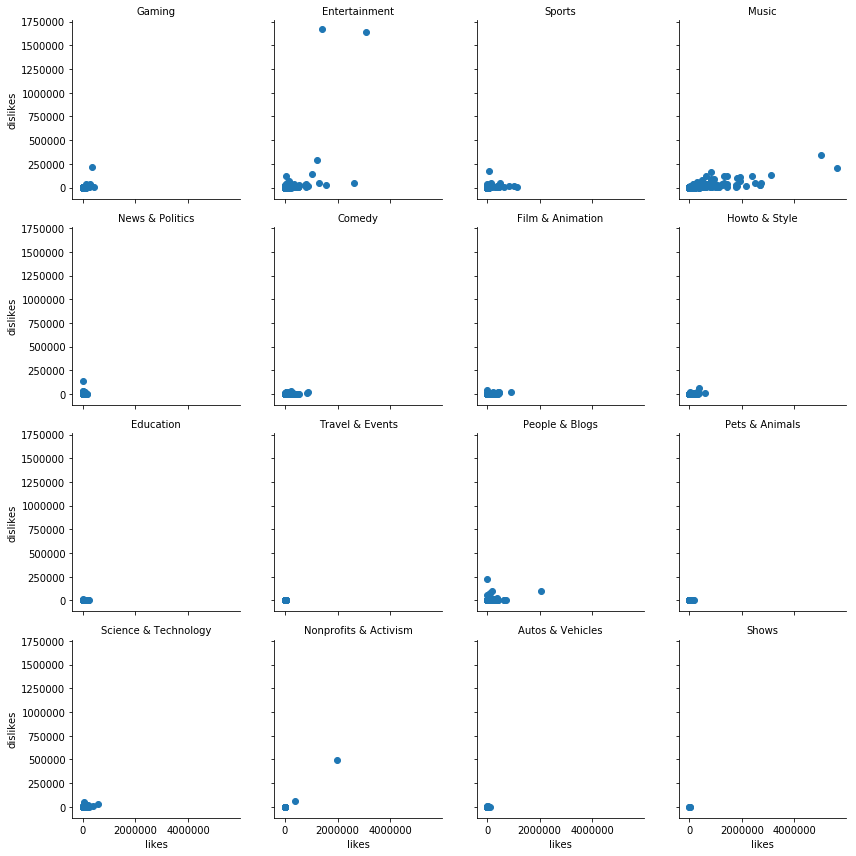

In [35]:
you = sns.FacetGrid(df, col="category_name",col_wrap=4,)
you= you.map(plt.scatter,"likes","dislikes")
you.set_titles("{col_name}")
plt.savefig('youtube_facet.png')

In [36]:

df["title_length"] = df["title"].apply(lambda x: len(x))

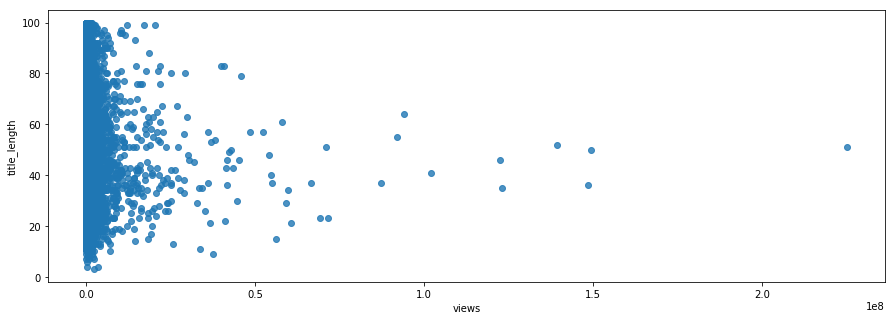

In [37]:
# Graph of title length versus the views
sns.regplot(x=df["views"], y=df["title_length"], fit_reg=False);

C:\Users\mithi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


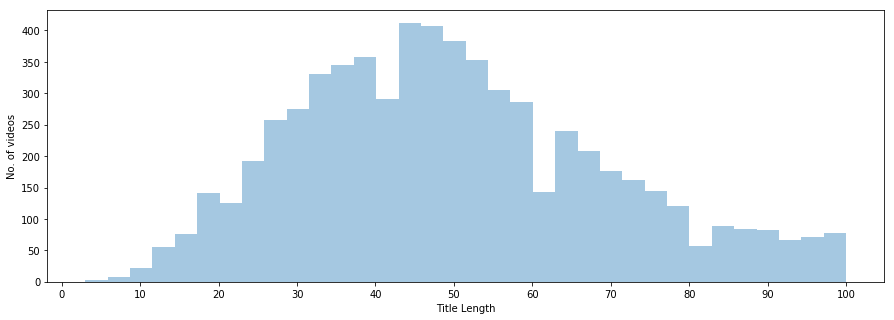

In [38]:
# Distribution of the number of videos by Title Length
fig, ax = plt.subplots()
g= sns.distplot(df['title_length'], kde=False, rug=False,)
g= ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10));

In [39]:
# Summing up the title length
df["title_length"].value_counts()

42     152
48     143
44     143
43     142
51     140
41     139
39     137
47     136
46     128
49     128
45     127
36     124
52     120
54     119
37     119
50     115
53     114
34     114
38     113
33     113
40     108
58     106
55     105
32     103
56     103
35     102
59     102
57      97
29      97
30      96
      ... 
86      32
82      31
83      29
88      28
90      28
81      26
85      25
97      25
96      25
92      24
87      24
100     23
13      22
14      22
98      22
94      22
95      22
16      21
89      21
93      21
15      19
12      12
11       9
10       8
9        5
8        3
7        3
4        2
3        1
6        1
Name: title_length, Length: 97, dtype: int64

In [40]:
#Creating new features
df['likes/dislikes'] = df ['likes'] / df['dislikes']
df['like/views'] =  df ['likes'] / df['views']
df['dislike/views'] =  df ['dislikes'] / df['views']
df['comments/views'] =  df ['comment_count'] / df['views']

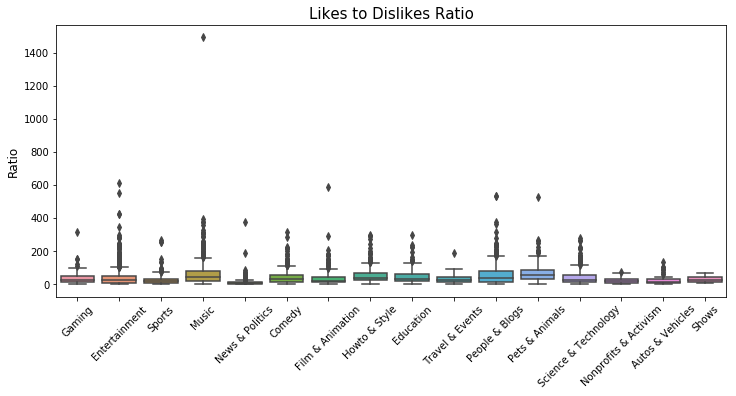

In [41]:
plt.figure(figsize = (12,5))
g= sns.boxplot(x='category_name',y='likes/dislikes',  data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes to Dislikes Ratio", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Ratio", fontsize=12);



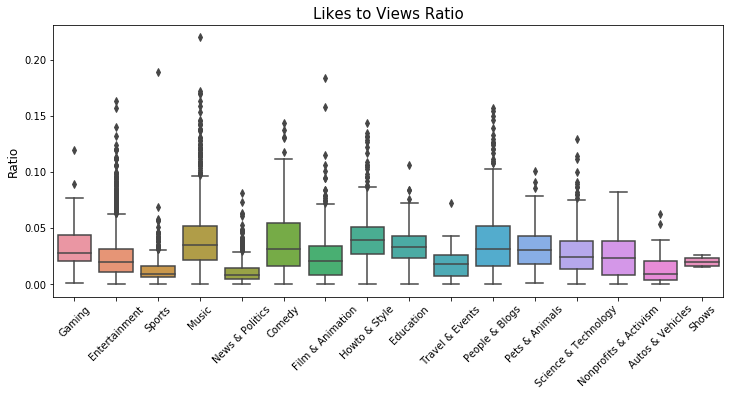

In [42]:
plt.figure(figsize = (12,5))
g1= sns.boxplot(x='category_name',y='like/views',  data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Likes to Views Ratio", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Ratio", fontsize=12);

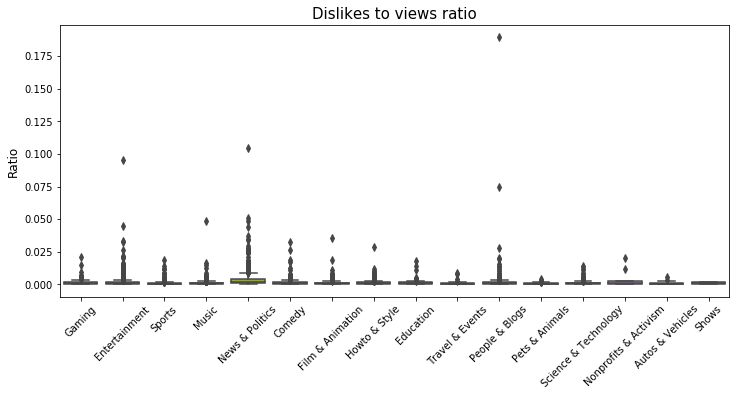

In [43]:
plt.figure(figsize = (12,5))
g= sns.boxplot(x='category_name',y='dislike/views',  data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes to views ratio", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Ratio", fontsize=12);

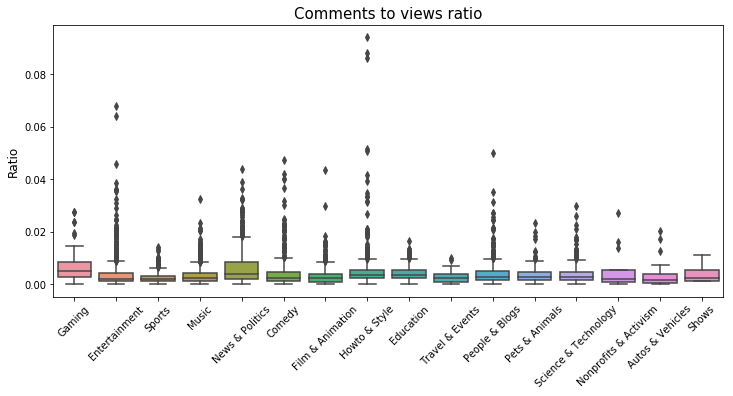

In [44]:
plt.figure(figsize = (12,5))
g= sns.boxplot(x='category_name',y='comments/views',  data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments to views ratio", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Ratio", fontsize=12);

In [45]:
df.head()

,video_id,index,trending_date,title,trend_duration,publish_to_trend,publish_to_trend_last,channel_title,category_id,publish_time,...,publish_date,publish_hour,month,tags_listed,days_to_trending,title_length,likes/dislikes,like/views,dislike/views,comments/views
0,FchkqXEg0qs,40549,2018-06-13,Nintendo @ E3 2018: Day 1,1,0,0,Nintendo,20,01:18:57,...,2018-06-13,1,6,"[nintendo, ""play"", ""play nintendo"", ""game"", ""g...",0,25,16.677724,0.019097,0.001145,0.000000
1,ZYCDNf1a-kY,5212,2017-12-10,James Franco Audience Questions Monologue - SNL,1,0,0,Saturday Night Live,24,06:14:05,...,2017-12-10,6,12,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",0,47,46.176471,0.083307,0.001804,0.013690
2,ss6qQM054B0,11000,2018-01-08,Oprah Winfrey Golden Globes Cecil B. DeMille A...,1,0,0,Pop & Sports HQ,17,03:24:55,...,2018-01-08,3,1,"[Oprah Winfrey, ""Golden Globes"", ""Golden Globe...",0,68,14.103239,0.022775,0.001615,0.004394
3,T3hXC5yNZOc,20969,2018-03-01,Iggy Azalea - Savior ft. Quavo,1,0,0,iggyazaleamusicVEVO,10,05:00:01,...,2018-03-01,5,3,"[Iggy, ""Azalea"", ""Savior"", ""Island"", ""Records""...",0,30,21.002462,0.119339,0.005682,0.014753
4,391JeKrI30w,13613,2018-01-23,Watch the House floor live,1,0,0,Washington Post,25,01:17:58,...,2018-01-23,1,1,"[breaking news video, ""video updates"", ""live v...",0,26,1.329545,0.004095,0.003080,0.002555


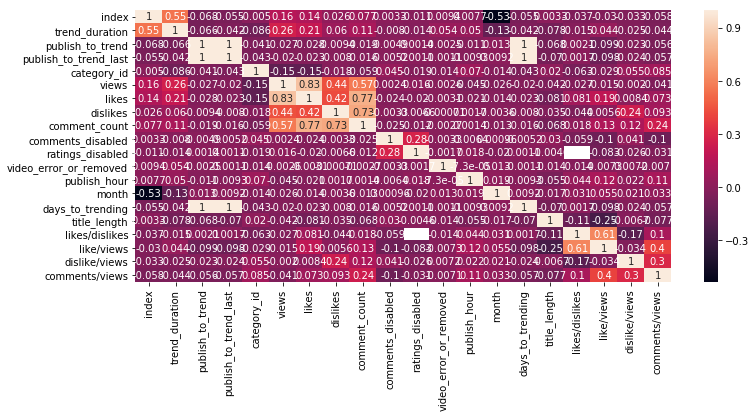

In [46]:
#Correlation Matrix
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(), annot=True);

In [47]:
#Creating Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
features = ['likes', 'comment_count','dislikes']
X = df[features].values
y = df['views'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

In [48]:
target = 'views'

In [49]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
X_train.shape

(4763, 3)

In [51]:
X_test.shape

(1588, 3)

In [52]:
lr = LinearRegression()

In [53]:
#Fitting model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#Model Score
lr.score(X_test, y_test)

0.8142409052840183

In [55]:
df.head()

,video_id,index,trending_date,title,trend_duration,publish_to_trend,publish_to_trend_last,channel_title,category_id,publish_time,...,publish_date,publish_hour,month,tags_listed,days_to_trending,title_length,likes/dislikes,like/views,dislike/views,comments/views
0,FchkqXEg0qs,40549,2018-06-13,Nintendo @ E3 2018: Day 1,1,0,0,Nintendo,20,01:18:57,...,2018-06-13,1,6,"[nintendo, ""play"", ""play nintendo"", ""game"", ""g...",0,25,16.677724,0.019097,0.001145,0.000000
1,ZYCDNf1a-kY,5212,2017-12-10,James Franco Audience Questions Monologue - SNL,1,0,0,Saturday Night Live,24,06:14:05,...,2017-12-10,6,12,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",0,47,46.176471,0.083307,0.001804,0.013690
2,ss6qQM054B0,11000,2018-01-08,Oprah Winfrey Golden Globes Cecil B. DeMille A...,1,0,0,Pop & Sports HQ,17,03:24:55,...,2018-01-08,3,1,"[Oprah Winfrey, ""Golden Globes"", ""Golden Globe...",0,68,14.103239,0.022775,0.001615,0.004394
3,T3hXC5yNZOc,20969,2018-03-01,Iggy Azalea - Savior ft. Quavo,1,0,0,iggyazaleamusicVEVO,10,05:00:01,...,2018-03-01,5,3,"[Iggy, ""Azalea"", ""Savior"", ""Island"", ""Records""...",0,30,21.002462,0.119339,0.005682,0.014753
4,391JeKrI30w,13613,2018-01-23,Watch the House floor live,1,0,0,Washington Post,25,01:17:58,...,2018-01-23,1,1,"[breaking news video, ""video updates"", ""live v...",0,26,1.329545,0.004095,0.003080,0.002555


In [56]:
new_list = []
for i in df['tags_listed']:
    for j in i:
        new_list.append(j)

In [57]:
len(new_list)

126781

In [58]:
len(set(new_list))

57957

In [59]:
# Hot encoding dummy variables
dummied_df = pd.get_dummies(df['category_name'], drop_first=True)
dummied_df.head()

,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
df1 = pd.concat([df, dummied_df],axis=1)

In [61]:
dummied_df.columns

Index(['Comedy', 'Education', 'Entertainment', 'Film & Animation', 'Gaming',
       'Howto & Style', 'Music', 'News & Politics', 'Nonprofits & Activism',
       'People & Blogs', 'Pets & Animals', 'Science & Technology', 'Shows',
       'Sports', 'Travel & Events'],
      dtype='object')

In [62]:
# Get it into one list
features = ['likes', 'dislikes','comment_count']
features_list=list(dummied_df.columns)
features.extend(features_list)

In [63]:
features

['likes',
 'dislikes',
 'comment_count',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Travel & Events']

In [64]:
# Test, Train, Split model

X = df1[features]
y = df1['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
#Scoring the test set
lr.score(X_test, y_test)

0.8132779944344659

Text(0.5,1,'Description_Sentiment')

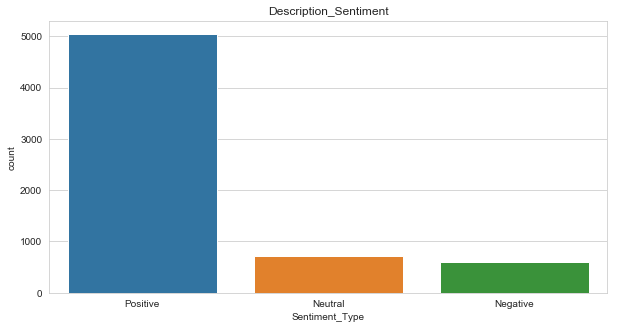

In [72]:
#Sentiment on Description
from textblob import TextBlob

bloblist_desc = list()

df_usa_descr_str=df['description'].astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)
ax.set_title('Description_Sentiment')

Text(0.5,1,'Tag_Sentiment')

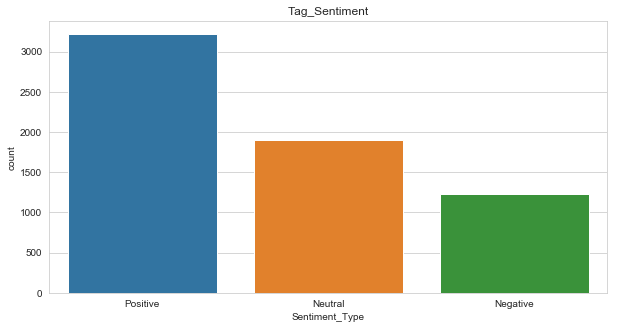

In [73]:
#Sentiment on tags
bloblist_tags = list()

df_usa_tags_str=df['tags']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)
ax.set_title('Tag_Sentiment')

Text(0.5,1,'Title_Sentiment')

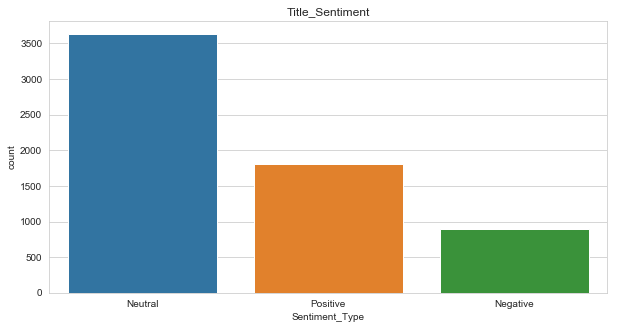

In [74]:
#Sentiment on Title
from textblob import TextBlob

bloblist_title = list()

df_usa_title_str=df['title']
for row in df_usa_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)
ax.set_title('Title_Sentiment')